# Pittsburgh Bridges Data Set

- https://www.datacamp.com/community/tutorials/categorical-datas
- http://cmdlinetips.com/

In [1]:
from utils.display_utils import display_heatmap
from utils.display_utils import show_frequency_distribution_predictors
from utils.display_utils import display_cumulative_variance_dataset

from utils.preprocessing_utils import preprocess_categorical_variables
from utils.preprocessing_utils import  preprocessing_data_rescaling

from utils.load_dataset_pittsburg_utils import load_pittsburg_dataset

from utils.training_utils import sgd_classifier_grid_search
from utils.training_utils import svm_linear_classifier_grid_search

In [2]:
import pandas as pd
import numpy as np

In [3]:
print(__doc__)

%matplotlib inline
# Matplotlib pyplot provides plotting API
import matplotlib as mpl
from matplotlib import pyplot as plt
import chart_studio.plotly.plotly as py
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Automatically created module for IPython interactive environment


In [4]:
dataset, features_vs_values = load_pittsburg_dataset()

/home/franec94/anaconda3/envs/data-space/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [5]:
dataset.head(5)

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
E2,1,25.0,1819,2,1037.0,2.0,2,2,3,3,2,6
E5,1,29.0,1837,2,1000.0,2.0,2,2,3,3,2,6
E7,1,27.0,1840,2,990.0,2.0,2,2,3,2,2,6
E8,1,28.0,1844,1,1000.0,1.0,2,2,1,3,2,5
E9,2,3.0,1846,2,1500.0,2.0,2,2,1,3,2,5


{'A': 1, 'M': 2, 'O': 3}


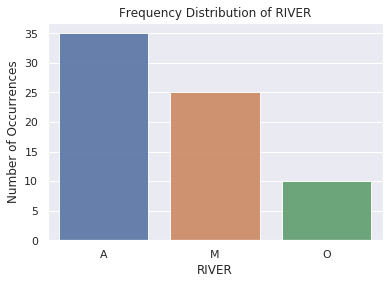

{'AQUEDUCT': 1, 'HIGHWAY': 2, 'RR': 3}


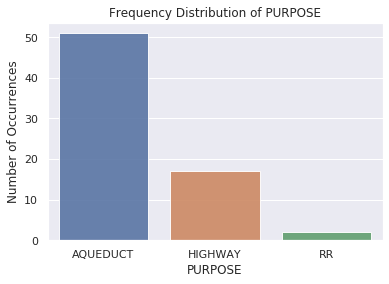

{'G': 1, 'N': 2}


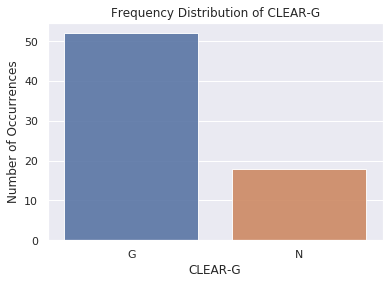

{'DECK': 1, 'THROUGH': 2}


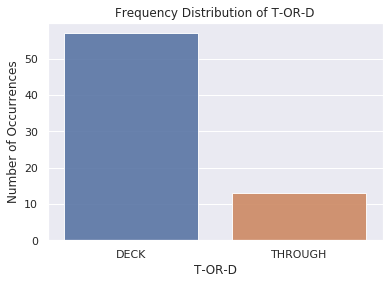

{'IRON': 1, 'STEEL': 2, 'WOOD': 3}


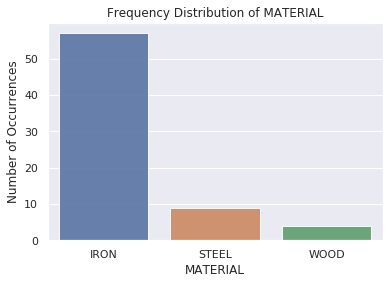

{'LONG': 1, 'MEDIUM': 2, 'SHORT': 3}


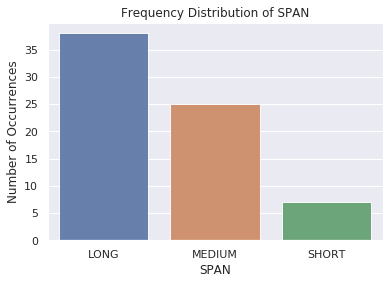

{'F': 1, 'S': 2, 'S-F': 3}


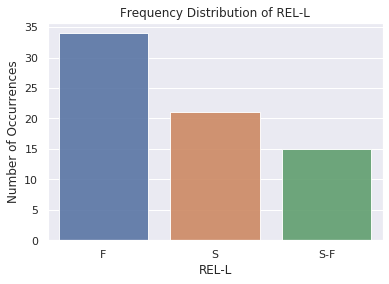

{'ARCH': 1, 'CANTILEV': 2, 'CONT-T': 3, 'SIMPLE-T': 4, 'SUSPEN': 5, 'WOOD': 6}


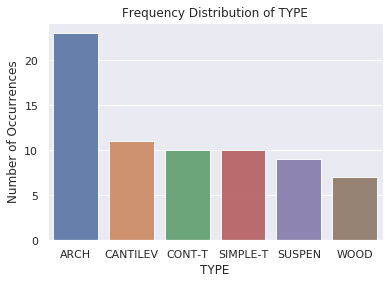

In [6]:
columns_2_avoid = ['ERECTED', 'LENGTH', 'LOCATION', 'LANES']
show_frequency_distribution_predictors(dataset, columns_2_avoid, features_vs_values)
# show_frequency_distribution_predictors(dataset, columns_2_avoid)

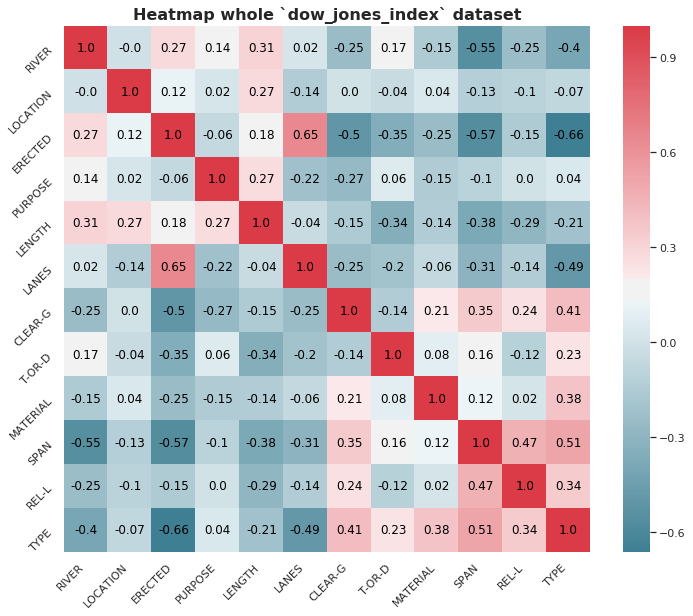

In [7]:
corr_result = dataset.corr()
display_heatmap(corr_result)

In [8]:
columns = dataset.columns
target_col = 'T-OR-D'

y = dataset[target_col].values
print(dataset['T-OR-D'].value_counts())
X = dataset.loc[:, dataset.columns != target_col]

2    57
1    13
Name: T-OR-D, dtype: int64


In [9]:
# Standardizing the features
scaler_methods = ['minmax', 'standard', 'norm']
scaler_method = 'minmax'
rescaledX = preprocessing_data_rescaling(scaler_method, X)

shape features matrix X, after normalizing:  (70, 11)


In [10]:
display_cumulative_variance_dataset(rescaledX, scaler_method)

Cumulative varation explained up to 2 pcs = 0.5154087204402559
Cumulative varation explained up to 5 pcs = 0.813131457095141
Cumulative varation explained up to 6 pcs = 0.8660435370346948
Cumulative varation explained up to 7 pcs = 0.9124687878331258
Cumulative varation explained up to 8 pcs = 0.9415546782687761
Cumulative varation explained up to 9 pcs = 0.9679836611029993
Cumulative varation explained up to 10 pcs = 0.9895504932823015


In [11]:
sgd_classifier_grid_search(rescaledX, y)

==== GRID SEARCH METHOD APPLYED ON: SGDClassifier Technique ====
==== PREPROCESSING METHOD: MinMax Technique ====

********************
Grid Search attempt no. : 1
--- Classification Report ---
              precision    recall  f1-score   support

    negative       0.12      1.00      0.22         1
    positive       1.00      0.59      0.74        17

    accuracy                           0.61        18
   macro avg       0.56      0.79      0.48        18
weighted avg       0.95      0.61      0.71        18

--- Confusion Matrix ---
[[ 1  0]
 [ 7 10]]
0.6111111111111112
Best Score: 0.8869047619047619
--- Best Params ---
n_components: 6
clf__alpha: 0.001
clf__learning_rate: 'optimal'
clf__loss: 'modified_huber'
clf__max_iter: 50
clf__penalty: 'l2'
clf__tol: 0.01
SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
    

In [12]:
svm_classifier_type = 'svm-rbf-kernel'
svm_linear_classifier_grid_search(rescaledX, y, svm_classifier_type)

==== GRID SEARCH METHOD APPLYED ON: RBF_SVM_Classifier Technique ====
==== PREPROCESSING METHOD: MinMax Technique ====

********************
Grid Search attempt no. : 1
--- Classification Report ---
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
    positive       0.94      0.94      0.94        17

    accuracy                           0.89        18
   macro avg       0.47      0.47      0.47        18
weighted avg       0.89      0.89      0.89        18

--- Confusion Matrix ---
[[ 0  1]
 [ 1 16]]
0.8888888888888888
Best Score: 0.8392857142857143
--- Best Params ---
n_components: 2
clf__C: 100.0
clf__gamma: 1.0
clf__kernel: 'rbf'
clf__max_iter: 1000.0
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=1000, probability=False, random_state=70, shrinking=True, tol=None,
    verbose=False)
must be real number, not NoneType

*******

/home/franec94/anaconda3/envs/data-space/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning:

Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



--- Classification Report ---
              precision    recall  f1-score   support

    negative       0.25      1.00      0.40         1
    positive       1.00      0.82      0.90        17

    accuracy                           0.83        18
   macro avg       0.62      0.91      0.65        18
weighted avg       0.96      0.83      0.88        18

--- Confusion Matrix ---
[[ 1  0]
 [ 3 14]]
0.8333333333333334
Best Score: 0.9047619047619048
--- Best Params ---
n_components: 7
clf__C: 100.0
clf__gamma: 0.5
clf__kernel: 'rbf'
clf__max_iter: 100.0
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=100, probability=False, random_state=70, shrinking=True, tol=None,
    verbose=False)
must be real number, not NoneType

********************
Grid Search attempt no. : 5


/home/franec94/anaconda3/envs/data-space/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning:

Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



--- Classification Report ---
              precision    recall  f1-score   support

    negative       0.25      1.00      0.40         1
    positive       1.00      0.82      0.90        17

    accuracy                           0.83        18
   macro avg       0.62      0.91      0.65        18
weighted avg       0.96      0.83      0.88        18

--- Confusion Matrix ---
[[ 1  0]
 [ 3 14]]
0.8333333333333334
Best Score: 0.9464285714285714
--- Best Params ---
n_components: 8
clf__C: 100.0
clf__gamma: 0.5
clf__kernel: 'rbf'
clf__max_iter: 100.0
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=100, probability=False, random_state=70, shrinking=True, tol=None,
    verbose=False)
must be real number, not NoneType

********************
Grid Search attempt no. : 6


/home/franec94/anaconda3/envs/data-space/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning:

Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



--- Classification Report ---
              precision    recall  f1-score   support

    negative       0.33      1.00      0.50         1
    positive       1.00      0.88      0.94        17

    accuracy                           0.89        18
   macro avg       0.67      0.94      0.72        18
weighted avg       0.96      0.89      0.91        18

--- Confusion Matrix ---
[[ 1  0]
 [ 2 15]]
0.8888888888888888
Best Score: 0.9642857142857143
--- Best Params ---
n_components: 9
clf__C: 100.0
clf__gamma: 0.5
clf__kernel: 'rbf'
clf__max_iter: 100.0
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=100, probability=False, random_state=70, shrinking=True, tol=None,
    verbose=False)
must be real number, not NoneType

********************
Grid Search attempt no. : 7
--- Classification Report ---
              precision    recall  f1-score   support

    negative       0.25      1.00      0.40 